### Esercitazione 6

### Modello di Ising 1D con campionamento Monte Carlo

In meccanica statistica, il **modello di Ising unidimensionale (1D)** è esattamente risolvibile. L’Hamiltoniana per un sistema di $N$ spin con interazione a primi vicini è:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})
$$

dove $\{ s_i \}_{i=1,\dots,N}$ sono variabili di spin che assumono valori in $\{-1, +1\}$, $J>0$ (modello ferromagnetico), e si impone la condizione periodica $s_{N+1} = s_1$.


L’obiettivo di questa simulazione è calcolare numericamente le principali grandezze termodinamiche del modello, campionando la distribuzione di Boltzmann:

$p(s_i) = \frac{e^{-\beta H}}{Z}$

utilizzando due metodi Monte Carlo:

- Algoritmo di Metropolis
- Algoritmo di Gibbs (heat bath)

Dove la funzione di partizione è:

$Z = \sum_{\{ s_i \}} e^{-\beta H} = \lambda_1^N + \lambda_2^N$

con:

$\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$

e $\beta = 1/T$.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice

start = 0  
stop  = 16 

with open("../OUTPUT/Risultati.dat", 'r') as f:
    dati = np.loadtxt(islice(f,start,stop), delimiter=",")
T_=dati[:,0]
U_=dati[:,1]
errU=dati[:,2]
Cv_=dati[:,5]
errCv=dati[:,6]
X_=dati[:,7]
errX=dati[:,8]

start = 16   
stop= 32
with open("../OUTPUT/Risultati.dat", 'r') as f:
    dati2 = np.loadtxt(islice(f, start,stop), delimiter=",")
T_g=dati2[:,0]
U_g=dati2[:,1]
errUg=dati2[:,2]
Cv_g=dati2[:,5]
errCvg=dati2[:,6]
X_g=dati2[:,7]
errXg=dati2[:,8]

start = 32   
stop= 48
with open("../OUTPUT/Risultati.dat", 'r') as f:
    dati2 = np.loadtxt(islice(f, start,stop), delimiter=",")

M_=dati2[:,3]
errM=dati2[:,4]

start = 48  
stop=65
with open("../OUTPUT/Risultati.dat", 'r') as f:
    dati2 = np.loadtxt(islice(f, start,stop), delimiter=",")

M_g=dati2[:,3]
errMg=dati2[:,4]


points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

Calcoliamo:

#### Energia interna per spin (con $h = 0$):

Essa la calcoliamo usando: $U(N,T) = \langle H \rangle_{h=0}$

Mentre il valore teorico si ottiene usando:

$\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)$


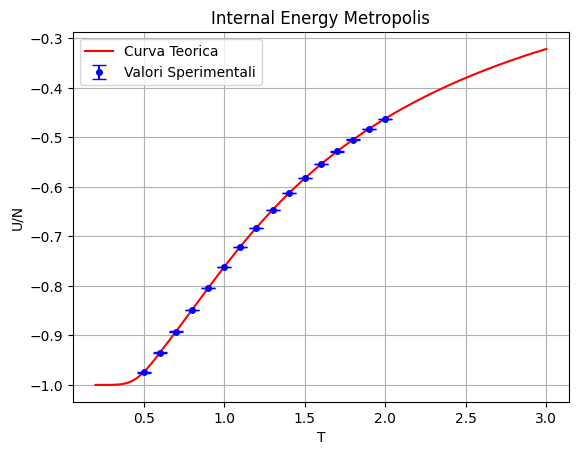

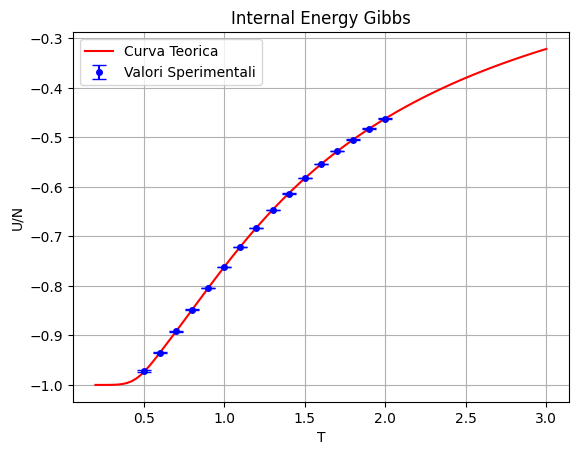

In [7]:
#/////////////////////////////////////////////////////      Energia Interna

plt.plot(T, e,label="Curva Teorica",color="red")
plt.errorbar(T_,U_,yerr=errU,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Internal Energy Metropolis')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid()
plt.show()
plt.close()

plt.plot(T, e,label="Curva Teorica",color="red")
plt.errorbar(T_g,U_g,yerr=errUg,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Internal Energy Gibbs')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid()
plt.show()
plt.close()

#### Calore specifico per spin (con $h = 0$):

Viene calcolato usando: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 

Il valore teorico si ottiene con:
$\frac{C(N,T)}{N} =
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} - N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$

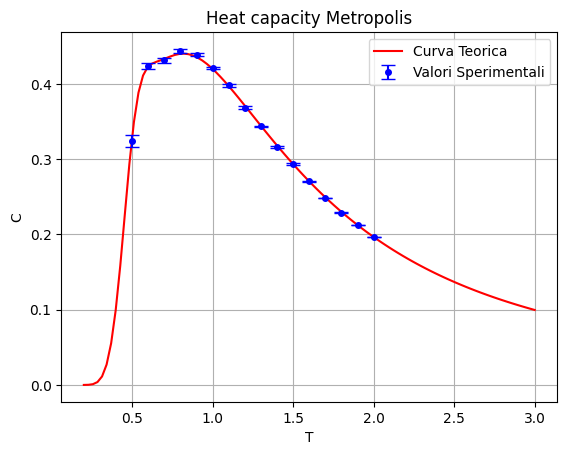

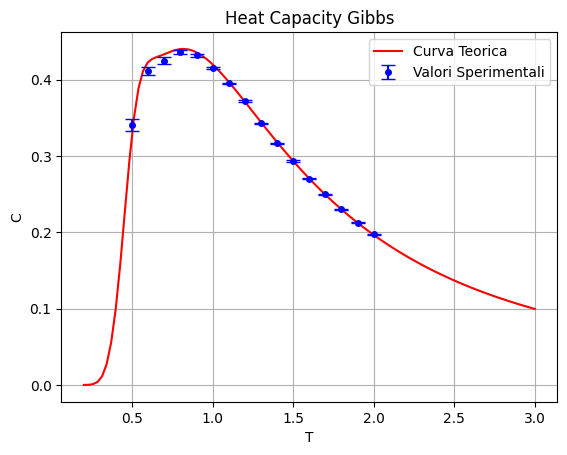

In [8]:
#/////////////////////////////////////////////#           Calore Specifico

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat,label="Curva Teorica",color="red")
plt.errorbar(T_,Cv_,yerr=errCv,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Heat capacity Metropolis')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid()
plt.show()
plt.close()

plt.plot(T, heat,label="Curva Teorica",color="red")
plt.errorbar(T_g,Cv_g,yerr=errCvg,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Heat Capacity Gibbs')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid()
plt.show()
plt.close()


#### Magnetizzazione (con $h=0.02$):

Essa la calcoliamo con: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$


e la formula esatta è:

$
\frac{M(N,T,h)}{N} = \frac{e^{\beta J} \sinh(\beta h)}{Z} \left[ \lambda_1^{N-1}\left(1+\frac{e^{\beta J} \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2(\beta h) - 2\sinh(2\beta J)}} \right) + \lambda_2^{N-1} \left(1 - \frac{e^{\beta J} \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2(\beta h) - 2\sinh(2\beta J)}} \right) \right]
$

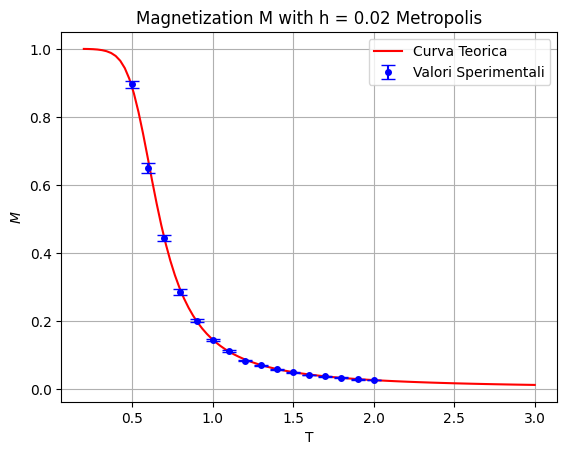

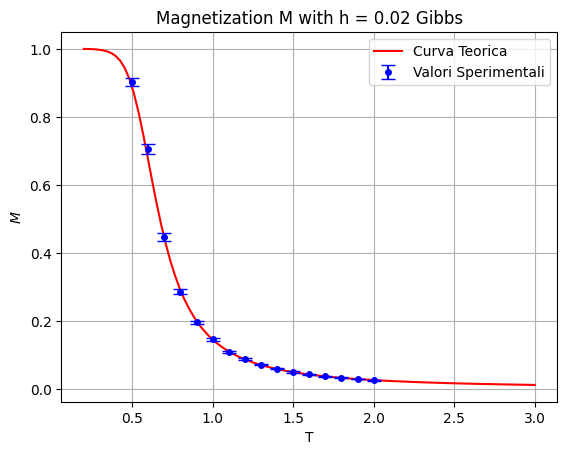

In [9]:
#////////////////////////////////////////////////////////     Magnetizzazione

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M,label="Curva Teorica",color="red")
plt.errorbar(T_, M_,yerr=errM,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Magnetization M with h = 0.02 Metropolis')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.ylabel('$M$')
plt.show()
plt.close()

plt.plot(T, M,label="Curva Teorica",color="red")
plt.errorbar(T_g, M_g,yerr=errMg,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Magnetization M with h = 0.02 Gibbs')
plt.xlabel('T')
plt.grid()
plt.legend()
plt.ylabel('$M$')
plt.show()
plt.close()

#### Suscettibilità magnetica (con $h = 0$):

Essa si ricava con: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$

Il valore teorico si ricava con:
$
\chi(N,T) = \beta \left[ \left\langle \left( \sum_{i=1}^N s_i \right)^2 \right\rangle \right]
= \beta e^{2\beta J} \cdot \left( \frac{1 - \tanh^N (\beta J)}{1 + \tanh^N (\beta J)} \right)
$

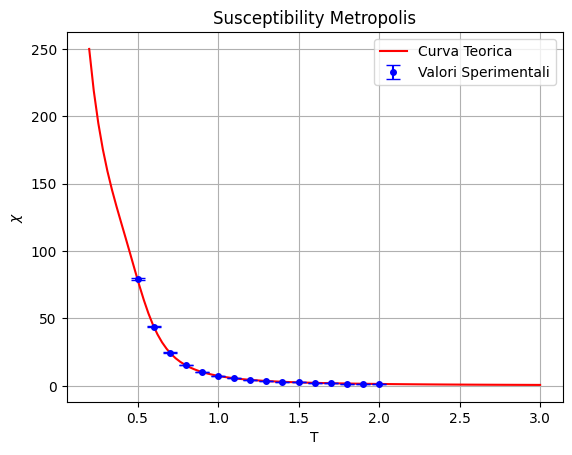

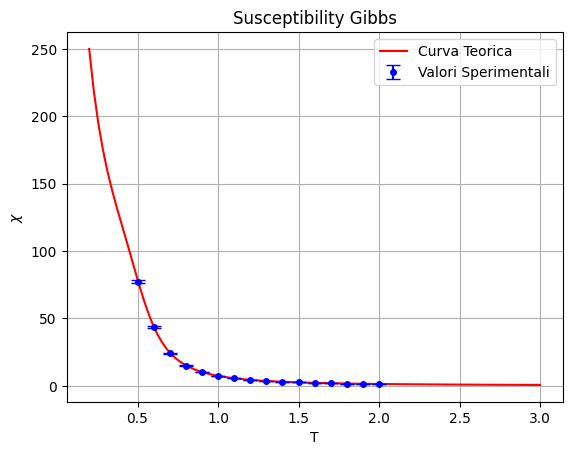

In [11]:
#//////////////////////////////////////////////////////////////       Suscettibilità

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X,label="Curva Teorica",color="red")
plt.errorbar(T_, X_,yerr=errX,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Susceptibility Metropolis')
plt.xlabel('T')
plt.legend()
plt.grid()
plt.ylabel('$\chi$')
plt.show()
plt.close()

plt.plot(T, X,label="Curva Teorica",color="red")
plt.errorbar(T_g, X_g,yerr=errXg,label="Valori Sperimentali",color="blue",fmt='o',capsize=5,markersize=4)
plt.title('Susceptibility Gibbs')
plt.xlabel('T')
plt.legend()
plt.grid()
plt.ylabel('$\chi$')
plt.show()
plt.close()